In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("/home/neethu/Downloads/Sales_add.csv")

In [3]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [10]:
from scipy.stats import ttest_1samp
from scipy import stats


In [6]:
before = data['Sales_before_digital_add(in $)']
after = data['Sales_After_digital_add(in $)']


# # Hypothesis testing for sales increase after stepping into digital marketing



# Separate the data into two groups: before and after digital marketing

In [7]:
print(before)

0     132921
1     149559
2     146278
3     152167
4     159525
5     137163
6     130625
7     131140
8     171259
9     141956
10    159339
11    178939
12    145062
13    151514
14    147463
15    177195
16    140862
17    167996
18    132135
19    152493
20    147425
21    130263
Name: Sales_before_digital_add(in $), dtype: int64


In [8]:
print(after)

0     270390
1     223334
2     244243
3     231808
4     258402
5     256948
6     222106
7     230637
8     226261
9     193735
10    203175
11    276279
12    205180
13    253131
14    229336
15    187305
16    234908
17    191517
18    227040
19    212579
20    263388
21    243020
Name: Sales_After_digital_add(in $), dtype: int64


# Perform paired t-test

In [11]:
t_statistic, p_value = stats.ttest_rel(before, after)

In [15]:
print(t_statistic)
print(p_value)

-12.09070525287017
6.336667004575778e-11


# Check the p-value against the significance level

Null hypothesis (H0): There is no increase in sales after stepping into digital marketing.
Alternative hypothesis (Ha): There is an increase in sales after stepping into digital marketing.

In [16]:
alpha = 0.05
if p_value < alpha:
    print("There is a significant increase in sales after stepping into digital marketing.")
else:
    print("There is no significant increase in sales after stepping into digital marketing.")

There is a significant increase in sales after stepping into digital marketing.


In [14]:
 p_value

6.336667004575778e-11

# Dependency between "Region" and "Manager"
# Create a contingency table

In [17]:
contingency_table = pd.crosstab(data['Region'], data['Manager'])

# Perform chi-square test of independence

In [19]:
from scipy.stats import chi2_contingency

In [21]:
chi2_stat, p_value2, dof, expected = chi2_contingency(contingency_table)

In [22]:
print(p_value2)

0.5493991051158094


# # Check the p-value against the significance level

In [23]:

alpha = 0.05
if p_value2 < alpha:
    print("There is a dependency between Region and Manager.")
else:
    print("There is no dependency between Region and Manager.")

There is no dependency between Region and Manager.


# plots


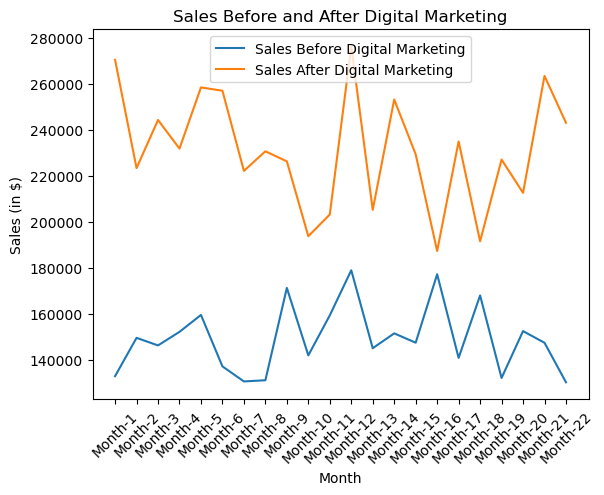

In [26]:
plt.plot(data['Month'], data['Sales_before_digital_add(in $)'], label='Sales Before Digital Marketing')
plt.plot(data['Month'], data['Sales_After_digital_add(in $)'], label='Sales After Digital Marketing')
plt.xlabel('Month')
plt.ylabel('Sales (in $)')
plt.title('Sales Before and After Digital Marketing')
plt.xticks(rotation=45)
plt.legend()
plt.show()